In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

In [2]:
project_path = os.path.abspath('..')
data_path = project_path + '/data/'

In [3]:
df = pd.read_excel(data_path + 'table_prepared.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2000 non-null   int64  
 1   name                 2000 non-null   object 
 2   area.name            2000 non-null   object 
 3   salary.from          1760 non-null   float64
 4   salary.to            1230 non-null   float64
 5   salary.gross         1999 non-null   float64
 6   salary.currency      2000 non-null   object 
 7   snippet.requirement  1985 non-null   object 
 8   experience.name      2000 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 140.8+ KB


In [5]:
# Видно, что есть 4 столбца числовых и 5 столбцов текстовых.

In [6]:
# Анализ числовых столбцов
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2000.0,1.245514e+08,3.157907e+06,42636573.0,124583354.5,124975919.0,125154797.5,125292360.0
salary.from,1760.0,3.555218e+05,1.913135e+06,5.0,60000.0,100000.0,180000.0,35000000.0
salary.to,1230.0,6.251000e+05,3.185398e+06,220.0,90000.0,150000.0,250000.0,45000000.0
salary.gross,1999.0,2.896448e-01,4.537110e-01,0.0,0.0,0.0,1.0,1.0


In [7]:
# salary.gross - бинарный признак.
# Значения по ЗП сильно рознятся.

In [8]:
df.head(10)

,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name
0,125271742,Strong Junior| Middle Frontend разработчик | В...,Шымкент,250000.0,400000.0,1.0,KZT,Опыт работы frontend-<highlighttext>разработчи...,От 1 года до 3 лет
1,125269826,React Developer,Ташкент,5000000.0,8000000.0,1.0,UZS,Опыт коммерческой разработки на JavaScript/Typ...,От 1 года до 3 лет
2,124976421,Frontend-разработчик-React,Ташкент,10000000.0,12000000.0,0.0,UZS,Опыт разработки с использованием React не мене...,От 1 года до 3 лет
3,125165161,Front-end и UX developer,Ташкент,8000000.0,13000000.0,1.0,UZS,Опыт работы front-end <highlighttext>developer...,От 3 до 6 лет
4,125255595,Веб-разработчик/Web-программист/Front End deve...,Астана,100000.0,400000.0,0.0,KZT,"Обязательное знание: HTML, CSS, JS. Желательно...",От 1 года до 3 лет
5,125256275,Senior Frontend Developer,Ташкент,2000.0,2000.0,0.0,USD,Ищем Frontend-<highlighttext>разработчика</hig...,Более 6 лет
6,125289988,Front-end Developer,Ярославль,40000.0,75000.0,0.0,RUR,"Отличное знание JavaScript, HTML, CSS. Опыт ра...",От 1 года до 3 лет
7,124298954,Middle Frontend Developer,Москва,180000.0,220000.0,0.0,RUR,Работал со следующими технологиями: JavaScript...,От 3 до 6 лет
8,125135271,"ReactJs, React Native developer",Астана,NaN,1500000.0,0.0,KZT,NaN,Нет опыта
9,124980166,Frontend-разработчик,Ташкент,400.0,700.0,0.0,USD,"Опыт работы с Next.js,(от 1-х лет). Strong с R...",От 1 года до 3 лет


In [9]:
# В столбце currency видим разные форматы, в которых представлена ЗП. 
df['salary.currency'].value_counts()

salary.currency
RUR    1631
USD     134
KZT     122
BYR      44
UZS      40
EUR      20
KGS       6
GEL       3
Name: count, dtype: int64

In [10]:
# Приведем все ЗП к единому формату (рубли):
def to_rub(row):
    rates = {
        "USD": 84.38,         # за 1 USD
        "EUR": 99.33,         # за 1 EUR
        "KZT": 0.156581,      # за 1 KZT
        "BYR": 27.38,         # за 1 BYR
        "UZS": 0.006692,      # за 1 UZS
        "KGS": 0.964892,      # за 1 KGS
        "GEL": 31.3225,        # за 1 GEL
        "RUR": 1.0
    }
    currency = row["salary.currency"].upper()
    amount = row[row.index[0]]  # если column name (например, 'salary_from' или 'salary_to')
    if currency not in rates:
        raise ValueError(f"Неизвестная валюта: {currency}")
    return float(amount) * rates[currency]

# Пример использования:
cols_to_convert = ['salary.from', 'salary.to']
target_cols = [col + '_rub' for col in cols_to_convert]
for col, target_col in zip(cols_to_convert, target_cols):
    df[target_col] = df[[col, 'salary.currency']].apply(to_rub, axis=1)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2000.0,1.245514e+08,3.157907e+06,42636573.0,124583354.5,124975919.0,1.251548e+08,125292360.0
salary.from,1760.0,3.555218e+05,1.913135e+06,5.0,60000.0,100000.0,1.800000e+05,35000000.0
salary.to,1230.0,6.251000e+05,3.185398e+06,220.0,90000.0,150000.0,2.500000e+05,45000000.0
salary.gross,1999.0,2.896448e-01,4.537110e-01,0.0,0.0,0.0,1.000000e+00,1.0
salary.from_rub,1760.0,1.279296e+05,9.271382e+04,136.9,68450.0,100000.0,1.500000e+05,843800.0
salary.to_rub,1230.0,1.825003e+05,1.337658e+05,220.0,99497.5,150000.0,2.495516e+05,1265700.0


In [12]:
df['clean_sal'] = df[target_cols].mean(axis=1)

<Axes: ylabel='clean_sal'>

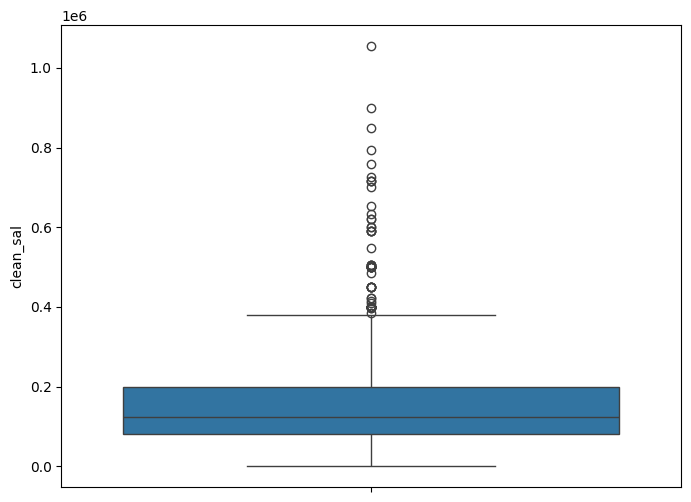

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(df['clean_sal'])

In [14]:
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.pca import PCA

# Предполагаем, что df и столбец 'clean_sal' уже существуют
X = df[['clean_sal']].values

# Инициируем и обучаем три модели
models = [
    KNN(),
    IForest(),
    PCA()
]

# Сохраняем результаты (0 — нормальное, 1 — аномалия)
for i, model in enumerate(models, 1):
    model.fit(X)
    df[f'anomaly{i}'] = model.predict(X)  # predict вернёт 1 (аномалия) или 0 (норма)

# Голосование большинством
df['anomaly'] = df[['anomaly1', 'anomaly2', 'anomaly3']].sum(axis=1) >= 2
df['anomaly'] = df['anomaly'].astype(int)  # Для совместимости: 1 — аномалия, 0 — норма


In [15]:
df['anomaly'].value_counts()

anomaly
0    1898
1     102
Name: count, dtype: int64

In [16]:
anomaly_vacancies = df[df['anomaly']==1].index
anomaly_vacancies

Index([  12,   20,   21,   27,   37,   44,   50,   79,   80,  123,
       ...
       1760, 1801, 1803, 1811, 1830, 1839, 1851, 1882, 1906, 1985],
      dtype='int64', length=102)

In [17]:
df.columns

Index(['id', 'name', 'area.name', 'salary.from', 'salary.to', 'salary.gross',
       'salary.currency', 'snippet.requirement', 'experience.name',
       'salary.from_rub', 'salary.to_rub', 'clean_sal', 'anomaly1', 'anomaly2',
       'anomaly3', 'anomaly'],
      dtype='object')

In [31]:
import ollama
from tqdm import tqdm

for idx in tqdm(anomaly_vacancies):
    row_text = df.loc[idx].to_dict()
    systemic_prompt = "Вы — аналитик. Объясни, почему в этих данных могла возникнуть аномалия, ответ представь в кратком виде.\n"
    #example_prompt = "Например: Размер оплаты существенно ниже рыночных стандартов для вакансий с аналогичными требованиями по знаниям и опыту в данном регионе.\n"
    prompt = f"Аномальные данные: {row_text}"

    # формируем список сообщений
    response = ollama.chat(
        model='gemma3:27b',
        messages=[
            {"role": "system", "content": systemic_prompt},
            {"role": "user", "content": prompt}
        ]
    )
    
    explanation = response['message']['content']
    df.at[idx, 'text'] = explanation


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 102/102 [02:11<00:00,  1.29s/it]


In [32]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)
df.loc[anomaly_vacancies, ['name', 'area.name','snippet.requirement' ,'experience.name','salary.from_rub','salary.to_rub','text']]

,name,area.name,snippet.requirement,experience.name,salary.from_rub,salary.to_rub,text
12,Преподаватель Frontend для детей,Ош,"Знания HTML, CSS, базового JavaScript (желательно знание Git, VS Code). Умение объяснять сложные вещи простыми словами. Ответственность, пунктуальность и умение...",От 1 года до 3 лет,26052.084,NaN,"Аномалия возникла из-за комбинации факторов: **несоответствующего текста вакансии, потенциально низкой зарплаты, отсутствия верхней границы зарплаты и нелогичного значения брутто-зарплаты (0.0).** Вероятно, данные содержат ошибку или неполную информацию.\n"
20,Financial director,Москва,Education: Knowledge of IFRS. Higher education (BA or MBA) in Finance / Economy. IT: Mastering SAP preferable (not mandatory).,Более 6 лет,500000.000,1200000.00,"Аномалия вызвана **несоответствием текста вакансии ее содержанию**. В описании финансового директора указаны языки программирования Data Science, что нетипично и указывает на ошибку при обработке или сборе данных.\n"
21,Финансовый директор (CFO),Москва,"This is not a traditional corporate finance role. We’re seeking someone agile, commercially minded, and comfortable juggling multiple high...",Более 6 лет,794640.000,NaN,"Аномалия возникла из-за **значительного расхождения между указанной зарплатой (8000 EUR) и типичным уровнем оплаты для позиции Финансового директора с опытом работы более 6 лет в Москве.** Вероятные причины: ошибка ввода данных, неполная информация о занятости (частичная занятость, стажировка) или неверное указание валюты.\n"
27,Front-end Developer (UI/UX & SEO Optimization),Алматы,"Опыт работы на позиции Front-end <highlighttext>Developer</highlighttext> не менее 2–3 лет. Отличное знание HTML5, CSS3, JavaScript и...",От 1 года до 3 лет,15658.100,31316.20,"Аномалия обусловлена **низкой зарплатой** (100 000 - 200 000 KZT) для Front-end разработчика с опытом 2-3 лет в Алматы, что значительно ниже рыночного уровня для данной позиции и региона.\n"
37,Технический директор (CTO),Москва,"Опыт 3+ лет на ролях СТО, Head of <highlighttext>Development</highlighttext> или System Architect в продукте (eCommerce – плюс). Глубокие знания высоконагруженных...",Более 6 лет,600000.000,850000.00,Аномалия обусловлена **несоответствием зарплаты рыночному уровню** для позиции Технического директора с опытом 6+ лет в Москве. Зарплатный диапазон (600-850 тыс. руб.) значительно ниже ожидаемого для данной квалификации и региона.\n
44,Chief Executive Officer/CEO в компанию,Алматы,"Опыт в роли CEO, COO. Предпринимательское мышление и ориентация на результат. Опыт масштабирования бизнесов. Гибкость,самостоятельность, готовность брать ответственность.",От 3 до 6 лет,156581.000,469743.00,"Аномалия обусловлена **несоответствием зарплатного диапазона (1-3 млн KZT) и опыта (3-6 лет) для позиции CEO в Алматы**. Вероятно, это **ошибка ввода данных** - либо неверный диапазон, либо валюта, либо неверно указан требуемый опыт.\n"
50,Начальник отдела информационных технологий,Москва,Опыт работы на руководящей позиции в ИТ-отделе от 5 лет. Глубокие знания и практический опыт: Администрирование Windows Server (2019...,От 3 до 6 лет,270000.000,350000.00,"Аномалия возникла из-за **противоречия между указанным диапазоном зарплаты и нулевым значением `salary.gross`**. Вероятно, это ошибка ввода данных или разное понимание ""брутто"" и ""нетто"". Текст также подтверждает наличие проблем с данными.\n"
79,Python-разработчик LLM,Москва,Амбициозный долгосрочный (3+ лет) проект «СберСити». Имеешь опыт разработки Restful Api на FastApi/Django/Flask. Имеешь опыт работы с...,От 1 года до 3 лет,300000.000,330000.00,"Аномалия вызвана **несоответствием зарплаты опыту и востребованной специализации**. Зарплата для Python-разработчика LLM в Москве с опытом 1-3 года значительно ниже рыночной, вероятно из-за ошибки в данных или неполного описания вакансии.\n"
80,Web-программист - стажер,Алматы,Carfast- Первый онлайн авто аукцион в Казахстане. Доброжелательный и целеустремленный командный игрок. Принимаете верные

Результат анализа:
* Алгоритмы pyod корректно отображают аномалии ниже среднего и некорректно обозначают верхнюю границу аномальных зп. Это связано с особенностями моделей и обучением моделей на ограниченной выборке
* В то же время LLM при описании "аномальных" объектов косвенно указала на проблему с разметкой. Для вакансий с зарплатой более 500к модель зачастую писала "заниженная зарплата для этой должности". (В реальности зарплата не является аномальной, в связи с чем модель видя аномалию галлюцинирует и дает завышенную оценку по ЗП для руководящих позиций)

In [33]:
df.to_excel(data_path + '/results.xlsx', index=False)